In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import os

from astropy.stats import sigma_clip
%matplotlib inline

In [2]:
channel = 'ch1'
planet = 'WASP-12b_old'
AOR_snip = 'r4'
addStack = True
datapath = '/home/taylor/Documents/Research/spitzer/'+planet+'/data/'+channel+'/'
plotpath = '/home/taylor/Documents/Research/spitzer/'+planet+'/analysis/FrameDiagnostics/'

nsigma = 3 #How bad does a value need to be before you clip it

plotpath = plotpath+channel
if addStack:
    plotpath = plotpath+'/addedStack/'
else:
    plotpath = plotpath+'/addedBlank/'

In [3]:
def load_data(path, AOR):
    pathflux  = path + 'flux'  + AOR + '.npy'
    pathbg    = path + 'bg'    + AOR + '.npy'
    pathxdata = path + 'xdata' + AOR + '.npy'
    pathydata = path + 'ydata' + AOR + '.npy'
    pathpsfwx = path + 'psfwx' + AOR + '.npy'
    pathpsfwy = path + 'psfwy' + AOR + '.npy'
    pathbeta  = path + 'beta'  + AOR + '.npy'
    
    flux  = np.load(pathflux )
    bg    = np.load(pathbg   )
    xdata = np.load(pathxdata)
    ydata = np.load(pathydata)
    psfwx = np.load(pathpsfwx)
    psfwy = np.load(pathpsfwy)
    beta  = np.load(pathbeta )
    
    return flux, bg, xdata, ydata, psfwx, psfwy, beta 

In [4]:
def sigclip(data, sigma=3, iters=5):
    new_data = sigma_clip(data, sigma=sigma, iters=iters)
    print(data.shape)
    print(np.where(data!=new_data)[0])
    return new_data

In [5]:
if planet =='WASP-12b':
    AOR = [a for a in os.listdir(datapath) if AOR_snip in a]

    data1 = np.asarray(load_data(plotpath, AOR[0]))
    data2 = load_data(plotpath, AOR[1])
    data3 = load_data(plotpath, AOR[2])

    nb_data = [len(data1[0]), len(data2[0]), len(data3[0])]

    data1 = np.where(np.isfinite(data1), data1, 99999)
    data2 = np.where(np.isfinite(data2), data2, 99999)
    data3 = np.where(np.isfinite(data3), data3, 99999)

    flux  = [sigclip(data1[0]), sigclip(data2[0]), sigclip(data3[0])]
    bg    = [sigclip(data1[1]), sigclip(data2[1]), sigclip(data3[1])]
    xdata = [sigclip(data1[2]), sigclip(data2[2]), sigclip(data3[2])]
    ydata = [sigclip(data1[3]), sigclip(data2[3]), sigclip(data3[3])]
    psfwx = [sigclip(data1[4]), sigclip(data2[4]), sigclip(data3[4])]
    psfwy = [sigclip(data1[5]), sigclip(data2[5]), sigclip(data3[5])]
    beta  = [sigclip(data1[6]), sigclip(data2[6]), sigclip(data3[6])]

else:
    AOR = [a for a in os.listdir(datapath) if AOR_snip in a]

    data1 = np.asarray(load_data(plotpath, AOR[0]))
    data2 = load_data(plotpath, AOR[1])

    nb_data = [len(data1[0]), len(data2[0])]

    data1 = np.where(np.isfinite(data1), data1, 99999)
    data2 = np.where(np.isfinite(data2), data2, 99999)

    flux  = [sigclip(data1[0]), sigclip(data2[0])]
    bg    = [sigclip(data1[1]), sigclip(data2[1])]
    xdata = [sigclip(data1[2]), sigclip(data2[2])]
    ydata = [sigclip(data1[3]), sigclip(data2[3])]
    psfwx = [sigclip(data1[4]), sigclip(data2[4])]
    psfwy = [sigclip(data1[5]), sigclip(data2[5])]
    beta  = [sigclip(data1[6]), sigclip(data2[6])]

(320, 64)
[  0   2   3   4   5   6   8   8   9  10  11  12  12  14  15  16  18  19
  20  21  21  23  23  24  25  26  28  28  29  29  30  32  32  34  35  35
  36  37  38  38  40  40  40  42  42  43  45  46  47  48  52  54  55  56
  56  57  58  59  59  59  60  60  61  62  63  63  64  65  66  67  68  69
  71  72  73  75  77  78  80  81  82  84  86  87  88  89  90  91  92  93
  93  94  95  96  97  97  98  99 100 101 101 102 105 106 107 107 108 110
 111 113 114 115 115 116 117 117 118 118 119 120 121 122 122 123 123 125
 126 126 127 128 130 131 132 133 134 135 136 137 140 141 143 144 146 147
 150 151 153 153 154 154 154 155 156 157 159 161 162 163 164 165 167 168
 168 169 171 171 172 173 173 174 176 178 179 180 181 183 184 185 186 189
 190 191 191 192 192 193 194 194 196 197 198 198 199 201 203 204 205 206
 206 207 209 210 211 214 215 215 216 217 220 221 223 224 225 226 228 228
 228 229 231 232 233 233 234 236 236 237 237 239 240 241 241 242 243 245
 246 249 249 250 251 251 252 253 254 256 

In [6]:
fluxval, bgval, xdataval, ydataval, psfwxval, psfwyval, betaval = np.empty((0,64)), np.empty((0,64)), np.empty((0,64)), \
np.empty((0,64)), np.empty((0,64)), np.empty((0,64)), np.empty((0,64))
fluxerr, bgerr, xdataerr, ydataerr, psfwxerr, psfwyerr, betaerr = np.empty((0,64)), np.empty((0,64)), np.empty((0,64)), \
np.empty((0,64)), np.empty((0,64)), np.empty((0,64)), np.empty((0,64))

In [7]:
def get_stats(data, median_arr, std_arr):
    for i in range(np.array(data).shape[0]):
        median = np.median(data[i], axis = 0)
        std    = np.ma.std(data[i], axis = 0)
        median_arr = np.append(median_arr, [median], axis = 0)
        std_arr    = np.append(std_arr, [std], axis = 0)
    return median_arr, std_arr

In [8]:
fluxval , fluxerr = get_stats(flux , fluxval, fluxerr)
bgval   , bgerr   = get_stats(bg   , bgval,   bgerr  )
xdataval, xdataerr= get_stats(xdata, xdataval, xdataerr)
ydataval, ydataerr= get_stats(ydata, ydataval, ydataerr)
psfwxval, psfwxerr= get_stats(psfwx, psfwxval, psfwxerr)
psfwyval, psfwyerr= get_stats(psfwy, psfwyval, psfwyerr)
betaval , betaerr = get_stats(beta , betaval , betaerr)

/usr/local/lib/python3.5/dist-packages/numpy/core/fromnumeric.py:664: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


In [9]:
bgval[0,:]

array([0.        , 0.        , 1.40900464, 1.50308708, 1.4753099 ,
       1.50046127, 1.4431767 , 1.42994353, 1.44092672, 1.34177306,
       1.33385853, 1.36873655, 1.32183349, 1.28081135, 1.23279672,
       1.20839015, 1.17204291, 1.20738132, 1.16881145, 1.16685518,
       1.14466677, 1.16573766, 1.07937924, 1.08958325, 1.1273324 ,
       1.05840905, 1.07031735, 1.09966648, 1.05145872, 1.01610072,
       1.0158629 , 0.98626485, 0.94793434, 1.00812191, 0.97108275,
       0.97756885, 0.98194947, 0.93492005, 0.9755615 , 0.97410601,
       0.96780756, 0.93565413, 0.91349119, 0.93592636, 0.94466844,
       0.91037786, 0.91279238, 0.94983932, 0.89745898, 0.885804  ,
       0.91216016, 0.87482064, 0.90660071, 0.86670199, 0.87586046,
       0.86769113, 0.88844507, 0.95828057, 0.87169073, 0.86523542,
       0.85901883, 0.83918598, 0.85539035, 0.86756848])

In [10]:
bgmed = np.nanmedian(bg[0], axis = 0)
flux[0]

/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:4033: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)


masked_array(
  data=[[--, 1.0017551957494886, 1.0038096147797106, ...,
         0.9949306482167954, 0.9960532744136438, 1.0143675029323673],
        [0.9821184097799717, 0.9858711824214537, 0.9947430469845397, ...,
         0.9952153329303022, 0.9970330648640243, 0.9949899676280985],
        [--, 0.9873841949918445, 1.0044719352599958, ...,
         0.9883972980040419, 0.987525729530004, 0.9980362410363537],
        ...,
        [0.9970216563955505, 1.0061290862725873, 0.9990709056238404, ...,
         0.9971908652740439, 0.9978692470489994, 1.007991152822087],
        [--, 1.002504194744532, 0.9897619857961816, ...,
         0.999028863474009, 0.9987189644410039, 0.995604921510468],
        [--, 1.0052602858344595, 1.000552615457189, ...,
         0.9908465990187156, 1.003305197796613, 1.0010225535957382]],
  mask=[[ True, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [ True, False, False, ..., False, False, False],
        

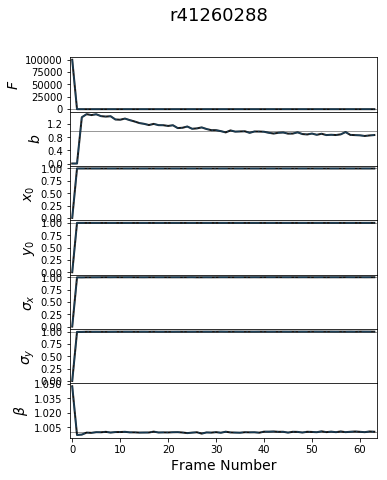

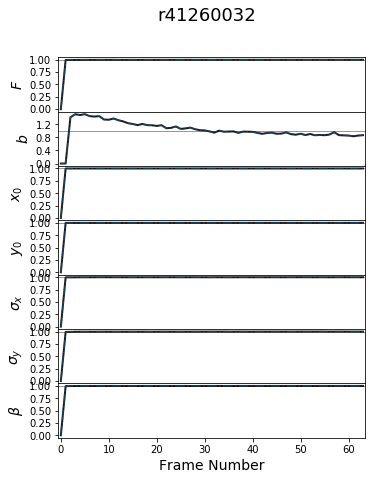

In [11]:
for i in range(np.array(flux).shape[0]):
    nb = np.arange(64)
    fig, axes = plt.subplots(ncols=1, nrows=7, sharex=True, figsize=(5.5,7))
    fig.suptitle(str(AOR[i]), fontsize=18)
    
    axes[0].axhline(y=1, color='k', alpha=0.4, linewidth=1)
    axes[1].axhline(y=1, color='k', alpha=0.4, linewidth=1)
    axes[2].axhline(y=1, color='k', alpha=0.4, linewidth=1)
    axes[3].axhline(y=1, color='k', alpha=0.4, linewidth=1)
    axes[4].axhline(y=1, color='k', alpha=0.4, linewidth=1)
    axes[5].axhline(y=1, color='k', alpha=0.4, linewidth=1)
    axes[6].axhline(y=1, color='k', alpha=0.4, linewidth=1)

    axes[0].errorbar(x = nb , y = fluxval[i,:] , yerr = fluxerr[i,:]/np.sqrt(nb_data[i]) , alpha=0.4, fmt='-.')
    axes[1].errorbar(x = nb , y = bgval[i,:]   , yerr = bgerr[i,:]/np.sqrt(nb_data[i])   , alpha=0.4, fmt='-.')
    axes[2].errorbar(x = nb , y = xdataval[i,:], yerr = xdataerr[i,:]/np.sqrt(nb_data[i]), alpha=0.4, fmt='-.')
    axes[3].errorbar(x = nb , y = ydataval[i,:], yerr = ydataerr[i,:]/np.sqrt(nb_data[i]), alpha=0.4, fmt='-.')
    axes[4].errorbar(x = nb , y = psfwxval[i,:], yerr = psfwyerr[i,:]/np.sqrt(nb_data[i]), alpha=0.4, fmt='-.')
    axes[5].errorbar(x = nb , y = psfwyval[i,:], yerr = psfwyerr[i,:]/np.sqrt(nb_data[i]), alpha=0.4, fmt='-.')
    axes[6].errorbar(x = nb , y = betaval[i,:] , yerr = betaerr[i,:]/np.sqrt(nb_data[i]) , alpha=0.4, fmt='-.')

    axes[0].plot(nb, fluxval[i,:] , color='k', linewidth=2, alpha=0.9)
    axes[1].plot(nb, bgval[i,:]   , color='k', linewidth=2, alpha=0.9)
    axes[2].plot(nb, xdataval[i,:], color='k', linewidth=2, alpha=0.9)
    axes[3].plot(nb, ydataval[i,:], color='k', linewidth=2, alpha=0.9)
    axes[4].plot(nb, psfwxval[i,:], color='k', linewidth=2, alpha=0.9)
    axes[5].plot(nb, psfwyval[i,:], color='k', linewidth=2, alpha=0.9)
    axes[6].plot(nb, betaval[i,:] , color='k', linewidth=2, alpha=0.9)
    
    #axes[1].set_ylim(0.95,1.05)
    
    
    axes[0].yaxis.set_major_locator(MaxNLocator(5,prune='both'))
    axes[1].yaxis.set_major_locator(MaxNLocator(5,prune='both'))
    axes[2].yaxis.set_major_locator(MaxNLocator(5,prune='both'))
    axes[3].yaxis.set_major_locator(MaxNLocator(5,prune='both'))
    axes[4].yaxis.set_major_locator(MaxNLocator(5,prune='both'))
    axes[5].yaxis.set_major_locator(MaxNLocator(5,prune='both'))
    axes[6].yaxis.set_major_locator(MaxNLocator(5,prune='both'))

    axes[0].set_ylabel(r'$F$', fontsize=14)
    axes[1].set_ylabel(r'$b$', fontsize=14)
    axes[2].set_ylabel(r'$x_0$', fontsize=14)
    axes[3].set_ylabel(r'$y_0$', fontsize=14)
    axes[4].set_ylabel(r'$\sigma _x$', fontsize=14)
    axes[5].set_ylabel(r'$\sigma _y$', fontsize=14)
    axes[6].set_ylabel(r'$\beta$', fontsize=14)
    
    axes[0].ticklabel_format(useOffset=False)
    axes[1].ticklabel_format(useOffset=False)
    axes[2].ticklabel_format(useOffset=False)
    axes[3].ticklabel_format(useOffset=False)
    axes[4].ticklabel_format(useOffset=False)
    axes[5].ticklabel_format(useOffset=False)
    axes[6].ticklabel_format(useOffset=False)
    
    axes[6].set_xlim(-0.5,63.5)
    axes[6].set_xlabel('Frame Number', fontsize=14)
    #fig.subplots_adjust(top=0.1)
    fig.subplots_adjust(hspace=0)
    fname = plotpath+'Frame_Diagnostics_'+ AOR[i]+'.pdf'
    fig.savefig(fname, bbox_inches='tight')

In [12]:
flux_all = np.empty((0, 64))
for i in range(np.array(flux).shape[0]):
    flux_all = np.append(flux_all, flux[i], axis = 0)
    flux_all = sigma_clip(flux_all, sigma=4, iters=5)
    
bg_all = np.empty((0, 64))
for i in range(np.array(flux).shape[0]):
    bg_all = np.append(bg_all, bg[i], axis = 0)
    bg_all = np.where(np.isfinite(bg_all), bg_all, 99999)
    bg_all = sigma_clip(bg_all, sigma=2, iters=2)
    
xdata_all = np.empty((0, 64))
for i in range(np.array(flux).shape[0]):
    xdata_all = np.append(xdata_all, xdata[i], axis = 0)
    xdata_all = sigma_clip(xdata_all, sigma=4, iters=5)

ydata_all = np.empty((0, 64))
for i in range(np.array(flux).shape[0]):
    ydata_all = np.append(ydata_all, ydata[i], axis = 0)
    ydata_all = sigma_clip(ydata_all, sigma=4, iters=5)
    
psfwx_all = np.empty((0, 64))
for i in range(np.array(flux).shape[0]):
    psfwx_all = np.append(psfwx_all, psfwx[i], axis = 0)
    psfwx_all = sigma_clip(psfwx_all, sigma=4, iters=5)

psfwy_all = np.empty((0, 64))
for i in range(np.array(flux).shape[0]):
    psfwy_all = np.append(psfwy_all, psfwy[i], axis = 0)
    psfwy_all = sigma_clip(psfwy_all, sigma=4, iters=5)
    
beta_all = np.empty((0, 64))
for i in range(np.array(flux).shape[0]):
    beta_all = np.append(beta_all, beta[i], axis = 0)
    beta_all = sigma_clip(beta_all, sigma=4, iters=5)
    

In [13]:
flux_med, flux_err = np.ma.median(flux_all, axis = 0), np.std(flux_all, axis = 0)/1374
bg_med, bg_err = np.ma.median(bg_all, axis = 0), np.std(bg_all, axis = 0)/1374
xdata_med, xdata_err = np.median(xdata_all, axis = 0), np.std(xdata_all, axis = 0)/1374
ydata_med, ydata_err = np.median(ydata_all, axis = 0), np.std(ydata_all, axis = 0)/1374
psfwx_med, psfwx_err = np.median(psfwx_all, axis = 0), np.std(psfwx_all, axis = 0)/1374
psfwy_med, psfwy_err = np.median(psfwy_all, axis = 0), np.std(psfwy_all, axis = 0)/1374
beta_med, beta_err = np.median(beta_all, axis = 0), np.std(beta_all, axis = 0)/1374

/usr/local/lib/python3.5/dist-packages/numpy/core/fromnumeric.py:664: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


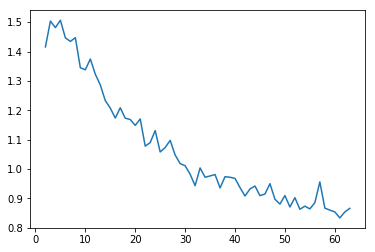

In [14]:
if planet == 'WASP-12b':
    bgall = np.concatenate((bg[0], bg[1], bg[2]), axis=0)
else:
    bgall = np.concatenate((bg[0], bg[1]), axis=0)

bgmed, bgstd = np.ma.median(bg[1], axis = 0), np.ma.std(bgall, axis = 0)
plt.plot(bgmed)
plt.show()

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:492: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


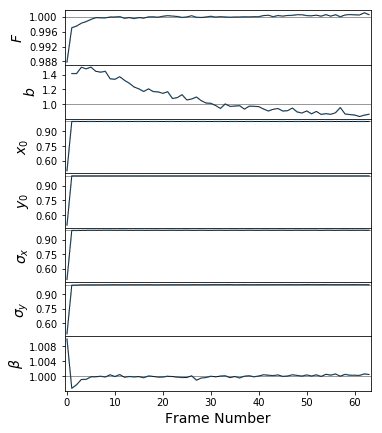

In [15]:
nb = np.arange(64)
fig, axes = plt.subplots(ncols=1, nrows=7, sharex=True, figsize=(5.5,7))
    
axes[0].axhline(y=1, color='k', alpha=0.4, linewidth=1)
axes[1].axhline(y=1, color='k', alpha=0.4, linewidth=1)
axes[2].axhline(y=1, color='k', alpha=0.4, linewidth=1)
axes[3].axhline(y=1, color='k', alpha=0.4, linewidth=1)
axes[4].axhline(y=1, color='k', alpha=0.4, linewidth=1)
axes[5].axhline(y=1, color='k', alpha=0.4, linewidth=1)
axes[6].axhline(y=1, color='k', alpha=0.4, linewidth=1)

axes[0].errorbar(x = nb , y = flux_med, yerr = flux_err , alpha=0.4, fmt='-.')
axes[1].errorbar(x = nb , y = bg_med, yerr = bg_err   , alpha=0.4, fmt='-.')
axes[2].errorbar(x = nb , y = xdata_med, yerr = xdata_err, alpha=0.4, fmt='-.')
axes[3].errorbar(x = nb , y = ydata_med, yerr = ydata_err, alpha=0.4, fmt='-.')
axes[4].errorbar(x = nb , y = psfwx_med, yerr = psfwy_err, alpha=0.4, fmt='-.')
axes[5].errorbar(x = nb , y = psfwy_med, yerr = psfwy_err, alpha=0.4, fmt='-.')
axes[6].errorbar(x = nb , y = beta_med, yerr = beta_err , alpha=0.4, fmt='-.')

axes[0].plot(nb, flux_med, color='k', linewidth=1, alpha=0.9)
axes[1].plot(nb, bg_med, color='k', linewidth=1, alpha=0.9)
axes[2].plot(nb, xdata_med, color='k', linewidth=1, alpha=0.9)
axes[3].plot(nb, ydata_med, color='k', linewidth=1, alpha=0.9)
axes[4].plot(nb, psfwx_med, color='k', linewidth=1, alpha=0.9)
axes[5].plot(nb, psfwy_med, color='k', linewidth=1, alpha=0.9)
axes[6].plot(nb, beta_med, color='k', linewidth=1, alpha=0.9)
    
    
axes[0].yaxis.set_major_locator(MaxNLocator(4,prune='both'))
axes[1].yaxis.set_major_locator(MaxNLocator(4,prune='both'))
axes[2].yaxis.set_major_locator(MaxNLocator(4,prune='both'))
axes[3].yaxis.set_major_locator(MaxNLocator(4,prune='both'))
axes[4].yaxis.set_major_locator(MaxNLocator(4,prune='both'))
axes[5].yaxis.set_major_locator(MaxNLocator(4,prune='both'))
axes[6].yaxis.set_major_locator(MaxNLocator(4,prune='both'))

axes[0].set_ylabel(r'$F$', fontsize=14)
axes[1].set_ylabel(r'$b$', fontsize=14)
axes[2].set_ylabel(r'$x_0$', fontsize=14)
axes[3].set_ylabel(r'$y_0$', fontsize=14)
axes[4].set_ylabel(r'$\sigma _x$', fontsize=14)
axes[5].set_ylabel(r'$\sigma _y$', fontsize=14)
axes[6].set_ylabel(r'$\beta$', fontsize=14)

axes[0].ticklabel_format(useOffset=False)
axes[1].ticklabel_format(useOffset=False)
axes[2].ticklabel_format(useOffset=False)
axes[3].ticklabel_format(useOffset=False)
axes[4].ticklabel_format(useOffset=False)
axes[5].ticklabel_format(useOffset=False)
axes[6].ticklabel_format(useOffset=False)

axes[6].set_xlim(-0.5,63.5)
axes[6].set_xlabel('Frame Number', fontsize=14)
#fig.subplots_adjust(top=0.1)
fig.subplots_adjust(hspace=0)
fname = plotpath+'Frame_Diagnostics2.pdf'
fig.savefig(fname, bbox_inches='tight')

In [16]:
meanflux, sigmaflux = np.median(flux_med), np.std(flux_med)
meanbg, sigmabg = np.median(bg_med), np.std(bg_med)
meanxdata, sigmaxdata = np.median(xdata_med), np.std(xdata_med)
meanydata, sigmaydata = np.median(ydata_med), np.std(ydata_med)
meanpsfwx, sigmapsfwx = np.median(psfwx_med), np.std(psfwx_med)
meanpsfwy, sigmapsfwy = np.median(psfwy_med), np.std(psfwy_med)
meanbeta, sigmabeta = np.median(beta_med), np.std(beta_med)

flag = False
while(flag == False):
    index = np.where(flux_med < (meanflux - nsigma*sigmaflux))
    np.append(index, np.where(flux_med > (meanflux + nsigma*sigmaflux)))
    sigmaflux2 = np.std(np.delete(flux_med, index))
    flag = (sigmaflux2 == sigmaflux)
    sigmaflux = sigmaflux2


flag = False
while(flag == False):
    index = np.where(bg_med < (meanbg - nsigma*sigmabg))
    np.append(index, np.where(bg_med > (meanbg + nsigma*sigmabg)))
    sigmabg2 = np.std(np.delete(bg_med, index))
    flag = (sigmabg2 == sigmabg)
    sigmabg = sigmabg2
    
flag = False
while(flag == False):
    index = np.where(xdata_med < (meanxdata - nsigma*sigmaxdata))
    np.append(index, np.where(xdata_med > (meanxdata + nsigma*sigmaxdata)))
    sigmaxdata2 = np.std(np.delete(xdata_med, index))
    flag = (sigmaxdata2 == sigmaxdata)
    sigmaxdata = sigmaxdata2
    
flag = False
while(flag == False):
    index = np.where(ydata_med < (meanydata - nsigma*sigmaydata))
    np.append(index, np.where(ydata_med > (meanydata + nsigma*sigmaydata)))
    sigmaydata2 = np.std(np.delete(ydata_med, index))
    flag = (sigmaydata2 == sigmaydata)
    sigmaydata = sigmaydata2

flag = False
while(flag == False):
    index = np.where(psfwx_med < (meanpsfwx - nsigma*sigmapsfwx))
    np.append(index, np.where(psfwx_med > (meanpsfwx + nsigma*sigmapsfwx)))
    sigmapsfwx2 = np.std(np.delete(psfwx_med, index))
    flag = (sigmapsfwx2 == sigmapsfwx)
    sigmapsfwx = sigmapsfwx2
    
flag = False
while(flag == False):
    index = np.where(psfwy_med < (meanpsfwy - nsigma*sigmapsfwy))
    np.append(index, np.where(psfwy_med > (meanpsfwy + nsigma*sigmapsfwy)))
    sigmapsfwy2 = np.std(np.delete(psfwy_med, index))
    flag = (sigmapsfwy2 == sigmapsfwy)
    sigmapsfwy = sigmapsfwy2
    
flag = False
while(flag == False):
    index = np.where(beta_med < (meanbeta - nsigma*sigmabeta))
    np.append(index, np.where(beta_med > (meanbeta + nsigma*sigmabeta)))
    sigmabeta2 = np.std(np.delete(beta_med, index))
    flag = (sigmabeta2 == sigmabeta)
    sigmabeta = sigmabeta2

/usr/local/lib/python3.5/dist-packages/numpy/core/fromnumeric.py:664: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


In [17]:
np.where(np.isnan(bg_all))

(array([], dtype=int64), array([], dtype=int64))

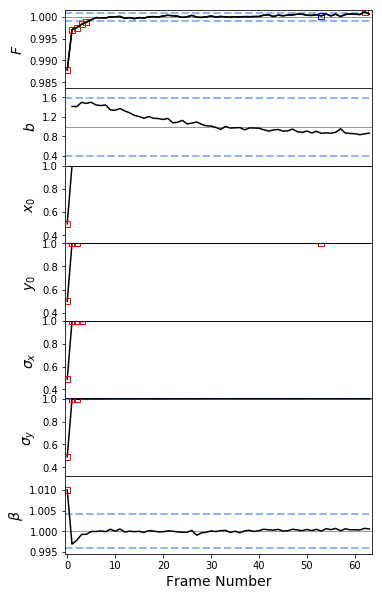

In [18]:
nb = np.arange(64)
fig, axes = plt.subplots(ncols=1, nrows=7, sharex=True, figsize=(5.5,10))

axes[0].axhline(y=1, color='k', alpha=0.4, linewidth=1)
axes[1].axhline(y=1, color='k', alpha=0.4, linewidth=1)
axes[2].axhline(y=1, color='k', alpha=0.4, linewidth=1)
axes[3].axhline(y=1, color='k', alpha=0.4, linewidth=1)
axes[4].axhline(y=1, color='k', alpha=0.4, linewidth=1)
axes[5].axhline(y=1, color='k', alpha=0.4, linewidth=1)
axes[6].axhline(y=1, color='k', alpha=0.4, linewidth=1)

axes[0].axhline(y= 1 + nsigma*sigmaflux , color='#6495ED', alpha=0.7, linewidth=2, linestyle = 'dashed')
axes[1].axhline(y= 1 + nsigma*sigmabg , color='#6495ED', alpha=0.7, linewidth=2, linestyle = 'dashed')
axes[2].axhline(y= 1 + nsigma*sigmaxdata, color='#6495ED', alpha=0.7, linewidth=2, linestyle = 'dashed')
axes[3].axhline(y= 1 + nsigma*sigmaydata, color='#6495ED', alpha=0.7, linewidth=2, linestyle = 'dashed')
axes[4].axhline(y= 1 + nsigma*sigmapsfwx, color='#6495ED', alpha=0.7, linewidth=2, linestyle = 'dashed')
axes[5].axhline(y= 1 + nsigma*sigmapsfwy, color='#6495ED', alpha=0.7, linewidth=2, linestyle = 'dashed')
axes[6].axhline(y= 1 + nsigma*sigmabeta , color='#6495ED', alpha=0.7, linewidth=2, linestyle = 'dashed')

axes[0].axhline(y= 1 - nsigma*sigmaflux , color='#6495ED', alpha=0.7, linewidth=2, linestyle = 'dashed')
axes[1].axhline(y= 1 - nsigma*sigmabg   , color='#6495ED', alpha=0.7, linewidth=2, linestyle = 'dashed')
axes[2].axhline(y= 1 - nsigma*sigmaxdata, color='#6495ED', alpha=0.7, linewidth=2, linestyle = 'dashed')
axes[3].axhline(y= 1 - nsigma*sigmaydata, color='#6495ED', alpha=0.7, linewidth=2, linestyle = 'dashed')
axes[4].axhline(y= 1 - nsigma*sigmapsfwx, color='#6495ED', alpha=0.7, linewidth=2, linestyle = 'dashed')
axes[5].axhline(y= 1 - nsigma*sigmapsfwy, color='#6495ED', alpha=0.7, linewidth=2, linestyle = 'dashed')
axes[6].axhline(y= 1 - nsigma*sigmabeta , color='#6495ED', alpha=0.7, linewidth=2, linestyle = 'dashed')

flux_markers = list(np.where(np.logical_or(flux_med<1-nsigma*sigmaflux, flux_med>1+nsigma*sigmaflux))[0])
bg_markers = list(np.where(np.logical_or(bg_med<1-nsigma*sigmabg, bg_med>1+nsigma*sigmabg))[0])
xdata_markers = list(np.where(np.logical_or(xdata_med<1-nsigma*sigmaxdata, xdata_med>1+nsigma*sigmaxdata))[0])
ydata_markers = list(np.where(np.logical_or(ydata_med<1-nsigma*sigmaydata, ydata_med>1+nsigma*sigmaydata))[0])
psfwx_markers = list(np.where(np.logical_or(psfwx_med<1-nsigma*sigmapsfwx, psfwx_med>1+nsigma*sigmapsfwx))[0])
psfwy_markers = list(np.where(np.logical_or(psfwy_med<1-nsigma*sigmapsfwy, psfwy_med>1+nsigma*sigmapsfwy))[0])
beta_markers = list(np.where(np.logical_or(beta_med<1-nsigma*sigmabeta, beta_med>1+nsigma*sigmabeta))[0])
flux_other_markers = np.concatenate((bg_markers, xdata_markers, ydata_markers, psfwx_markers, psfwy_markers, beta_markers))
flux_other_markers = list(np.setdiff1d(flux_other_markers, flux_markers).astype(int))
axes[0].plot(nb, flux_med , 'k', mec ='r', marker='s', markevery=flux_markers,fillstyle='none')
axes[0].plot(nb, flux_med , 'k', mec ='b', marker='s', markevery=flux_other_markers,fillstyle='none')
axes[1].plot(nb, bg_med   , 'k', mec ='r', marker='s', markevery=bg_markers,fillstyle='none')
axes[2].plot(nb, xdata_med, 'k', mec ='r', marker='s', markevery=xdata_markers,fillstyle='none')
axes[3].plot(nb, ydata_med, 'k', mec ='r', marker='s', markevery=ydata_markers,fillstyle='none')
axes[4].plot(nb, psfwx_med, 'k', mec ='r', marker='s', markevery=psfwx_markers,fillstyle='none')
axes[5].plot(nb, psfwy_med, 'k', mec ='r', marker='s', markevery=psfwy_markers,fillstyle='none')
axes[6].plot(nb, beta_med , 'k', mec ='r', marker='s', markevery=beta_markers,fillstyle='none')

#axes[0].set_ylim(0.99, 1.01)
axes[0].set_ylim(np.min([(np.min(flux_med)-1)*4/3+1, 1-(nsigma+1)*sigmaflux]), np.max([(np.max(flux_med)-1)*4/3+1, 1+(nsigma+1)*sigmaflux]))
axes[1].set_ylim(np.min([(np.min(bg_med)-1)*4/3+1, 1-(nsigma+1)*sigmabg]), np.max([(np.max(bg_med)-1)*4/3+1, 1+(nsigma+1)*sigmabg]))
axes[2].set_ylim(np.min([(np.min(xdata_med)-1)*4/3+1, 1-(nsigma+1)*sigmaxdata]), np.max([(np.max(xdata_med)-1)*4/3+1, 1+(nsigma+1)*sigmaxdata]))
axes[3].set_ylim(np.min([(np.min(ydata_med)-1)*4/3+1, 1-(nsigma+1)*sigmaydata]), np.max([(np.max(ydata_med)-1)*4/3+1, 1+(nsigma+1)*sigmaydata]))
axes[4].set_ylim(np.min([(np.min(psfwx_med)-1)*4/3+1, 1-(nsigma+1)*sigmapsfwx]), np.max([(np.max(psfwx_med)-1)*4/3+1, 1+(nsigma+1)*sigmapsfwx]))
axes[5].set_ylim(np.min([(np.min(psfwy_med)-1)*4/3+1, 1-(nsigma+1)*sigmapsfwy]), np.max([(np.max(psfwy_med)-1)*4/3+1, 1+(nsigma+1)*sigmapsfwy]))
axes[6].set_ylim(np.min([(np.min(beta_med)-1)*4/3+1, 1-(nsigma+1)*sigmabeta]), np.max([(np.max(beta_med)-1)*4/3+1, 1+(nsigma+1)*sigmabeta]))

axes[0].yaxis.set_major_locator(MaxNLocator(4,prune='both'))
axes[1].yaxis.set_major_locator(MaxNLocator(4,prune='both'))
axes[2].yaxis.set_major_locator(MaxNLocator(4,prune='both'))
axes[3].yaxis.set_major_locator(MaxNLocator(4,prune='both'))
axes[4].yaxis.set_major_locator(MaxNLocator(4,prune='both'))
axes[5].yaxis.set_major_locator(MaxNLocator(4,prune='both'))
axes[6].yaxis.set_major_locator(MaxNLocator(4,prune='both'))

axes[0].set_ylabel(r'$F$', fontsize=14)
axes[1].set_ylabel(r'$b$', fontsize=14)
axes[2].set_ylabel(r'$x_0$', fontsize=14)
axes[3].set_ylabel(r'$y_0$', fontsize=14)
axes[4].set_ylabel(r'$\sigma _x$', fontsize=14)
axes[5].set_ylabel(r'$\sigma _y$', fontsize=14)
axes[6].set_ylabel(r'$\beta$', fontsize=14)

axes[0].ticklabel_format(useOffset=False)
axes[1].ticklabel_format(useOffset=False)
axes[2].ticklabel_format(useOffset=False)
axes[3].ticklabel_format(useOffset=False)
axes[4].ticklabel_format(useOffset=False)
axes[5].ticklabel_format(useOffset=False)
axes[6].ticklabel_format(useOffset=False)

axes[6].set_xlim(-0.5,63.5)
axes[6].set_xlabel('Frame Number', fontsize=14)
fig.subplots_adjust(hspace=0)
fname = plotpath + 'Frame_Diagnostics1.pdf'
fig.savefig(fname, bbox_inches='tight')

In [19]:
print(flux_markers)

[0, 1, 2, 3, 4, 62]


In [20]:
'''blue  represents frames exhibiting unsually psf metric or background flux with usable photometry'''

'blue  represents frames exhibiting unsually psf metric or background flux with usable photometry'

In [21]:
print(((flux_med-1)/sigmaflux)[(flux_med-1)/sigmaflux > nsigma])
print(((flux_med-1)/sigmaflux)[(flux_med-1)/sigmaflux < -nsigma])

[3.545728438441686]
[-37.9158928218258 -9.046366014956371 -7.61480185409093 -5.214620251429027
 -3.84945532531706]
